# Sentiment Analysis - binary classification

## Introduction

We are going to perform a simple classification of the amazon reviews' sentiment.

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression

baby_df = pd.read_csv('amazon_baby.csv.zip')
baby_df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


## Data preparation


Steps we are going to do:

1. Remove punctuation from reviews.   
2. Replace all missing (nan) revies with empty "" string.  
3. Drop all the entries with rating = 3, as they have neutral sentiment.   
4. Set all positive ($\geq$4) ratings to 1 and negative($\leq$2) to -1.

In [ ]:
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

### Dropping missing reviews

In [ ]:
baby_df[baby_df["review"].isna()] = ""

,name,review,rating


### Removing punctuation

In [ ]:

baby_df["review"] = baby_df["review"].apply(str).apply(remove_punctuation)

True

### Dropping neutral reviews

In [ ]:
baby_df = baby_df[baby_df["rating"] != 3]

# Test:
sum(baby_df["rating"] == 3)

0

### Mapping reviews to either 1 (positive) or -1 (negative)

In [171]:
baby_df["rating"] = baby_df["rating"].astype(int)

In [ ]:
baby_df.loc[(baby_df.rating <= 2),'rating']= -1
baby_df.loc[(baby_df.rating >= 4),'rating']= 1

baby_df.value_counts()

,rating
count,165975.000000
mean,0.681964
std,0.731388
min,-1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


### Distribution of reviews

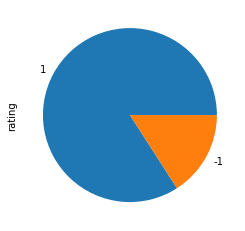

In [174]:
baby_df.rating.value_counts().plot(kind='pie')

### CountVectorizer
In order to analyze strings, we need to assign them numerical values. We will use one of the simplest string representation, which transforms strings into the $n$ dimensional vectors. The number of dimensions will be the size of our dictionary, and then the values of the vector will represent the number of appereances of the given word in the sentence.

### Splitting into train and test sets 

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(baby_df, test_size=0.2)

### Vectorizing the reviews

In [178]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(train.review)

## Training the Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

y_train = train.rating
y_test = test.rating

<132780x122029 sparse matrix of type '<class 'numpy.int64'>'
	with 7102041 stored elements in Compressed Sparse Row format>

In [180]:
%%time

model = model_all = LogisticRegression(max_iter=10000).fit(X=X_train, y=y_train)

CPU times: user 2min 2s, sys: 2min 4s, total: 4min 7s
Wall time: 2min 6s


### Top 10 the most positive and negative words

In [ ]:
zipped = list(zip(model.coef_.flatten(), vectorizer.get_feature_names_out()))

sorted_words = sorted(zipped, key= lambda x: x[0])

sorted_words[:10], sorted_words[-10:]

([(-2.835838219670819, 'dissapointed'),
  (-2.774577537993409, 'worst'),
  (-2.6656151513190958, 'poorly'),
  (-2.4159466474427678, 'useless'),
  (-2.3885400644936152, 'worthless'),
  (-2.385242427441257, 'disappointing'),
  (-2.334405725743697, 'bummed'),
  (-2.327633427469466, 'concept'),
  (-2.2467722267491217, 'intelligent'),
  (-2.2076138884306675, 'disappointed')],
 [(1.8044038581740074, 'hesitate'),
  (1.8191948180817366, 'perfect'),
  (1.874528806083676, 'thankful'),
  (1.885687985180898, 'awesome'),
  (1.9072756458186724, 'excellent'),
  (1.9633512734077787, 'wonderfully'),
  (1.9978254166670104, 'skeptical'),
  (2.038381463616364, 'rich'),
  (2.0821785123809247, 'saves'),
  (2.367278330449952, 'lifesaver')])


## Predicting 

In [ ]:
X_test_all = vectorizer.transform(test.review)

y_pred = model.predict(X_test_all)

### The prediction in terms of probability

In [ ]:
y_prob = model.predict_proba(X_test_all)

y_prob

array([[1.45674057e-02, 9.85432594e-01],
       [2.27721959e-05, 9.99977228e-01],
       [7.55156032e-02, 9.24484397e-01],
       ...,
       [1.26284823e-02, 9.87371518e-01],
       [8.86425430e-04, 9.99113575e-01],
       [5.70214234e-01, 4.29785766e-01]])

### The most negative and positive review

In [ ]:
sorted_reviews = sorted(zip(test.review, y_prob,), key= lambda x: x[1][0])

In [185]:
most_positive = sortedd[:1]

most_positive

My local BRU had only 15 strollers to look at and most of them were umbrella or AIO travel systems I still liked the BJ City Mini due to its low weight and easy fold but it lacked the options I wanted and the growth potential for a second kid  I also really liked the JJ Cole Broadway but again no second seat So I traveled a ways to visit BBB and boy was that overwhelming but fun They had tons of strollers including many great convertible strollers that go from 12 kid configurations but most of them were tandem and not side to side The issue with tandem strollers such as the Baby Jogger City Mini and the Britax was that although it had lots of optional configurations they really didnt work for two kids I didnt see either of them being comfortable in recline and it was just cumbersome to get them in and out  So off to sidebyside Near the end of our visit we discovered the Bugaboo Donkey and boy was that a delight to test drive With its side bag and colorful shades and cool features it wa

In [186]:
most_negative = sortedd[-1:]

most_negative

My husband and I are VERY disappointed and shocked by how awful this bassinet is We ordered it because we liked the color and it looked nice and simple and it was inexpensive Well we got what we paid for1 It comes in 3 parts so you would think assembly would be a piece of cake EVERYTHING about assembling this is awful There are metal wires on the back that you have to force into these clips which is almost impossible because the wire is way too long I 10 months pregnant had to push the opposite side of the bassinet as hard as i could so my husband could try to get the wire into the clips that it comes with This took us a very long time2 Next we tried to pull the legs apart which were wedged together by all the screws and things attached3 THE CANOPY You would think this would be a sinch right The canopy wires or wine as they call them in the instructions was backwards The canonpy is so flimsy that it hardly is worthwhile Once we got the canopy wire turned around correctly we pushed as h

### Calculating accuracy of the model

In [ ]:
correct = sum(y_pred == test.rating)
accuracy = correct/len(test)

accuracy

0.9314655821659888

## Training the Logistic Regression model with limited set of words (dictionary)

In [188]:
significant_words = ['love','great','easy','old','little','perfect','loves','well','able','car','broke','less','even','waste','disappointed','work','product','money','would','return']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

vectorizer = CountVectorizer(vocabulary=significant_words)
X_train = vectorizer.fit_transform(train.review)

y_train = train.rating
y_test = test.rating

In [190]:
%%time
model = model_voc = LogisticRegression().fit(X=X_train, y=y_train)

CPU times: user 421 ms, sys: 6.79 ms, total: 428 ms
Wall time: 425 ms


### Top 10 

In [191]:
zipped = list(zip(model.coef_.flatten(), vectorizer.get_feature_names_out()))

words_weights = sorted(zipped, key= lambda x: x[0])

words_weights[:10], words_weights[-10:]

([(-2.379050544271473, 'disappointed'),
  (-2.0566398129722843, 'return'),
  (-2.0161132708921694, 'waste'),
  (-1.6737916020762107, 'broke'),
  (-0.8863582503451614, 'money'),
  (-0.6318000434931377, 'work'),
  (-0.5246165859183308, 'even'),
  (-0.33406605477080953, 'would'),
  (-0.3135729959664947, 'product'),
  (-0.2151626415386641, 'less')],
 [(0.06461735274574591, 'car'),
  (0.09627686314775412, 'old'),
  (0.2021343361614224, 'able'),
  (0.489752309455154, 'well'),
  (0.5139188023743163, 'little'),
  (0.9467209639321255, 'great'),
  (1.1624170295942238, 'easy'),
  (1.365884901871973, 'love'),
  (1.4889537375591053, 'perfect'),
  (1.7512559580822782, 'loves')])

## Predicting

In [199]:
X_test_voc = vectorizer.transform(test.review)

y_pred = model.predict(X_test_voc)
y_prob = model.predict_proba(X_test_voc)

In [ ]:
sorted_reviews = sorted(zip(test.review, y_prob,), key= lambda x: x[1][0])

### The most negative and positive review

In [ ]:
most_positive = sorted[1:]

most_positive

In [194]:
most_negative = sorted[-1:]

most_negative

I am extremely disappointed with this productwhat a complete waste of money  I originally had a diaper genie however my son broke the top off of it and I decided to try the diaper dekor because it seemed a little easier to use  The design is a nice idea but boy does this thing STINK We change this every couple of days before its even full and it still stinks  Ive tried deodorizers baking soda lysol etc and it still takes your breath away  We never experienced any odor problems with the diaper genieIm kicking myself for wasting the money on this thing I actually went out and bought another diaper genie because we couldnt take the stench of the diaper dekor anymore  Do yourself a favor and dont waste the money
I was excited to give these instruments to my 4 year old for her birthday because they are cute painted instruments that look even better in person than online I assumed that since the set was wooden and 1015 more expensive than other similar sets it would be durable My daughter op

### Calculating accuracy of the model

In [195]:
correct = sum(y_pred == test.rating)
accuracy_limited = correct/len(test)

accuracy_limited



0.8663654164783853

## Comparison

The diffrence in perfomance is so large that the model not limited by the vocabulary does not converge in the default max iteration limit (100). The vocabulary limited model converges in less than 100 iterations.

For my local envinronment, fitting the model takes:

*   the standard model runs 2m 2s.
*   the vocabulary limited model runs 0.5s.

So, the vocabulary model is almost 300 times faster.

The accuracy drops by (percent)

In [197]:
(accuracy - accuracy_limited)/((accuracy+accuracy_limited)/2)*100

7.242078453057191

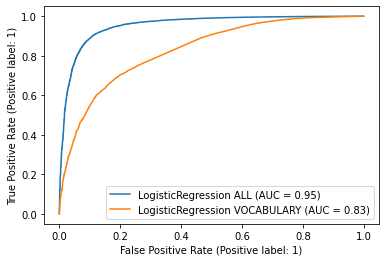

In [198]:
from sklearn.metrics import RocCurveDisplay

fig = RocCurveDisplay.from_estimator(model_all, X_test_all, test.rating, name='LogisticRegression ALL') 
RocCurveDisplay.from_estimator(model_voc, X_test_voc, test.rating, ax = fig.ax_, name='LogisticRegression VOCABULARY') 

Also, ROC Curve shows AUC score of 0.96 vs 0.83. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. Where 0.5 score would be given by a random classifier.

In my opinion, in this particular example problem, sacricifing the accuracy for the increased perfomance is not worth since the diffrence is still in minutes. However, I would still recognize the vocabulary limited model as relatively good. It's worth remembering that using predefined vocabulary can drastically reduce model fitting time with little sacrifice in accuracy.